### Exploring Pubmed 200k

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
abstracts=[]
text=[]
categories=['BACKGROUND','OBJECTIVE','METHODS','RESULTS','CONCLUSIONS']
ncat=len(categories)
with open('./pubmed-rct/PubMed_200k_RCT/train.txt','r') as f:
    for l in f:
        #if entering new abstract, initialize count list
        if l[0]=='#':
            abcount=[]
            ab=[]
        #if ending abstract, append count list to list of abstracts
        elif l=='\n':
            abstracts.append(abcount)
            text.append(' '.join(ab))
        #if within abstract, add category index of line (given by first word in line)
        else:
            abcount.append(categories.index(l.split('\t')[0]))
            ab.append(l.split('\t')[1])

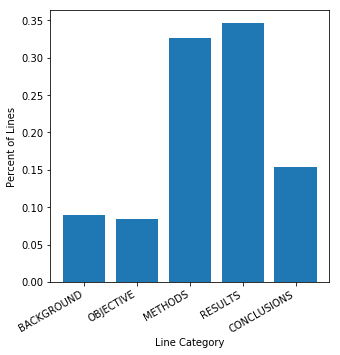

In [3]:
catcounts=np.array(Counter(np.hstack(abstracts)).values()).astype(float)

plt.figure(figsize=(5,5))
plt.bar(range(len(catcounts)),catcounts/np.sum(catcounts))
plt.xticks(range(len(categories)),categories,rotation=30,ha='right')
plt.xlabel('Line Category');plt.ylabel('Percent of Lines')


In [4]:
#Useful to have above as transfer matrix, counting how many times category i is followed by category j
T=[]
for a in abstracts:
    Ta=np.zeros((ncat,ncat))
    for nl in range(len(a)-1):
        Ta[zip(a[nl:(nl+2)])]+=1
    T.append(Ta)
T=np.stack(T)

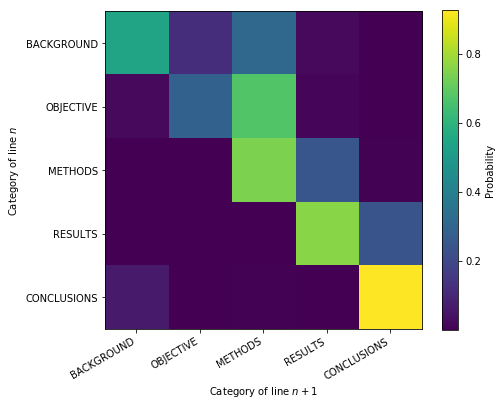

In [5]:
P=T.sum(0)
P=P/P.sum(1)[:,None]

plt.figure(figsize=(6,5))
plt.imshow(P)
plt.colorbar(label='Probability')
plt.tight_layout()
plt.xticks(range(len(categories)),categories,rotation=30,ha='right')
plt.yticks(range(len(categories)),categories)
plt.ylabel('Category of line $n$')
plt.xlabel('Category of line $n+1$')

In [6]:
%qtconsole

In [7]:
X=np.vstack([t.ravel() for t in T])
U,S,V=np.linalg.svd(X,full_matrices=False)

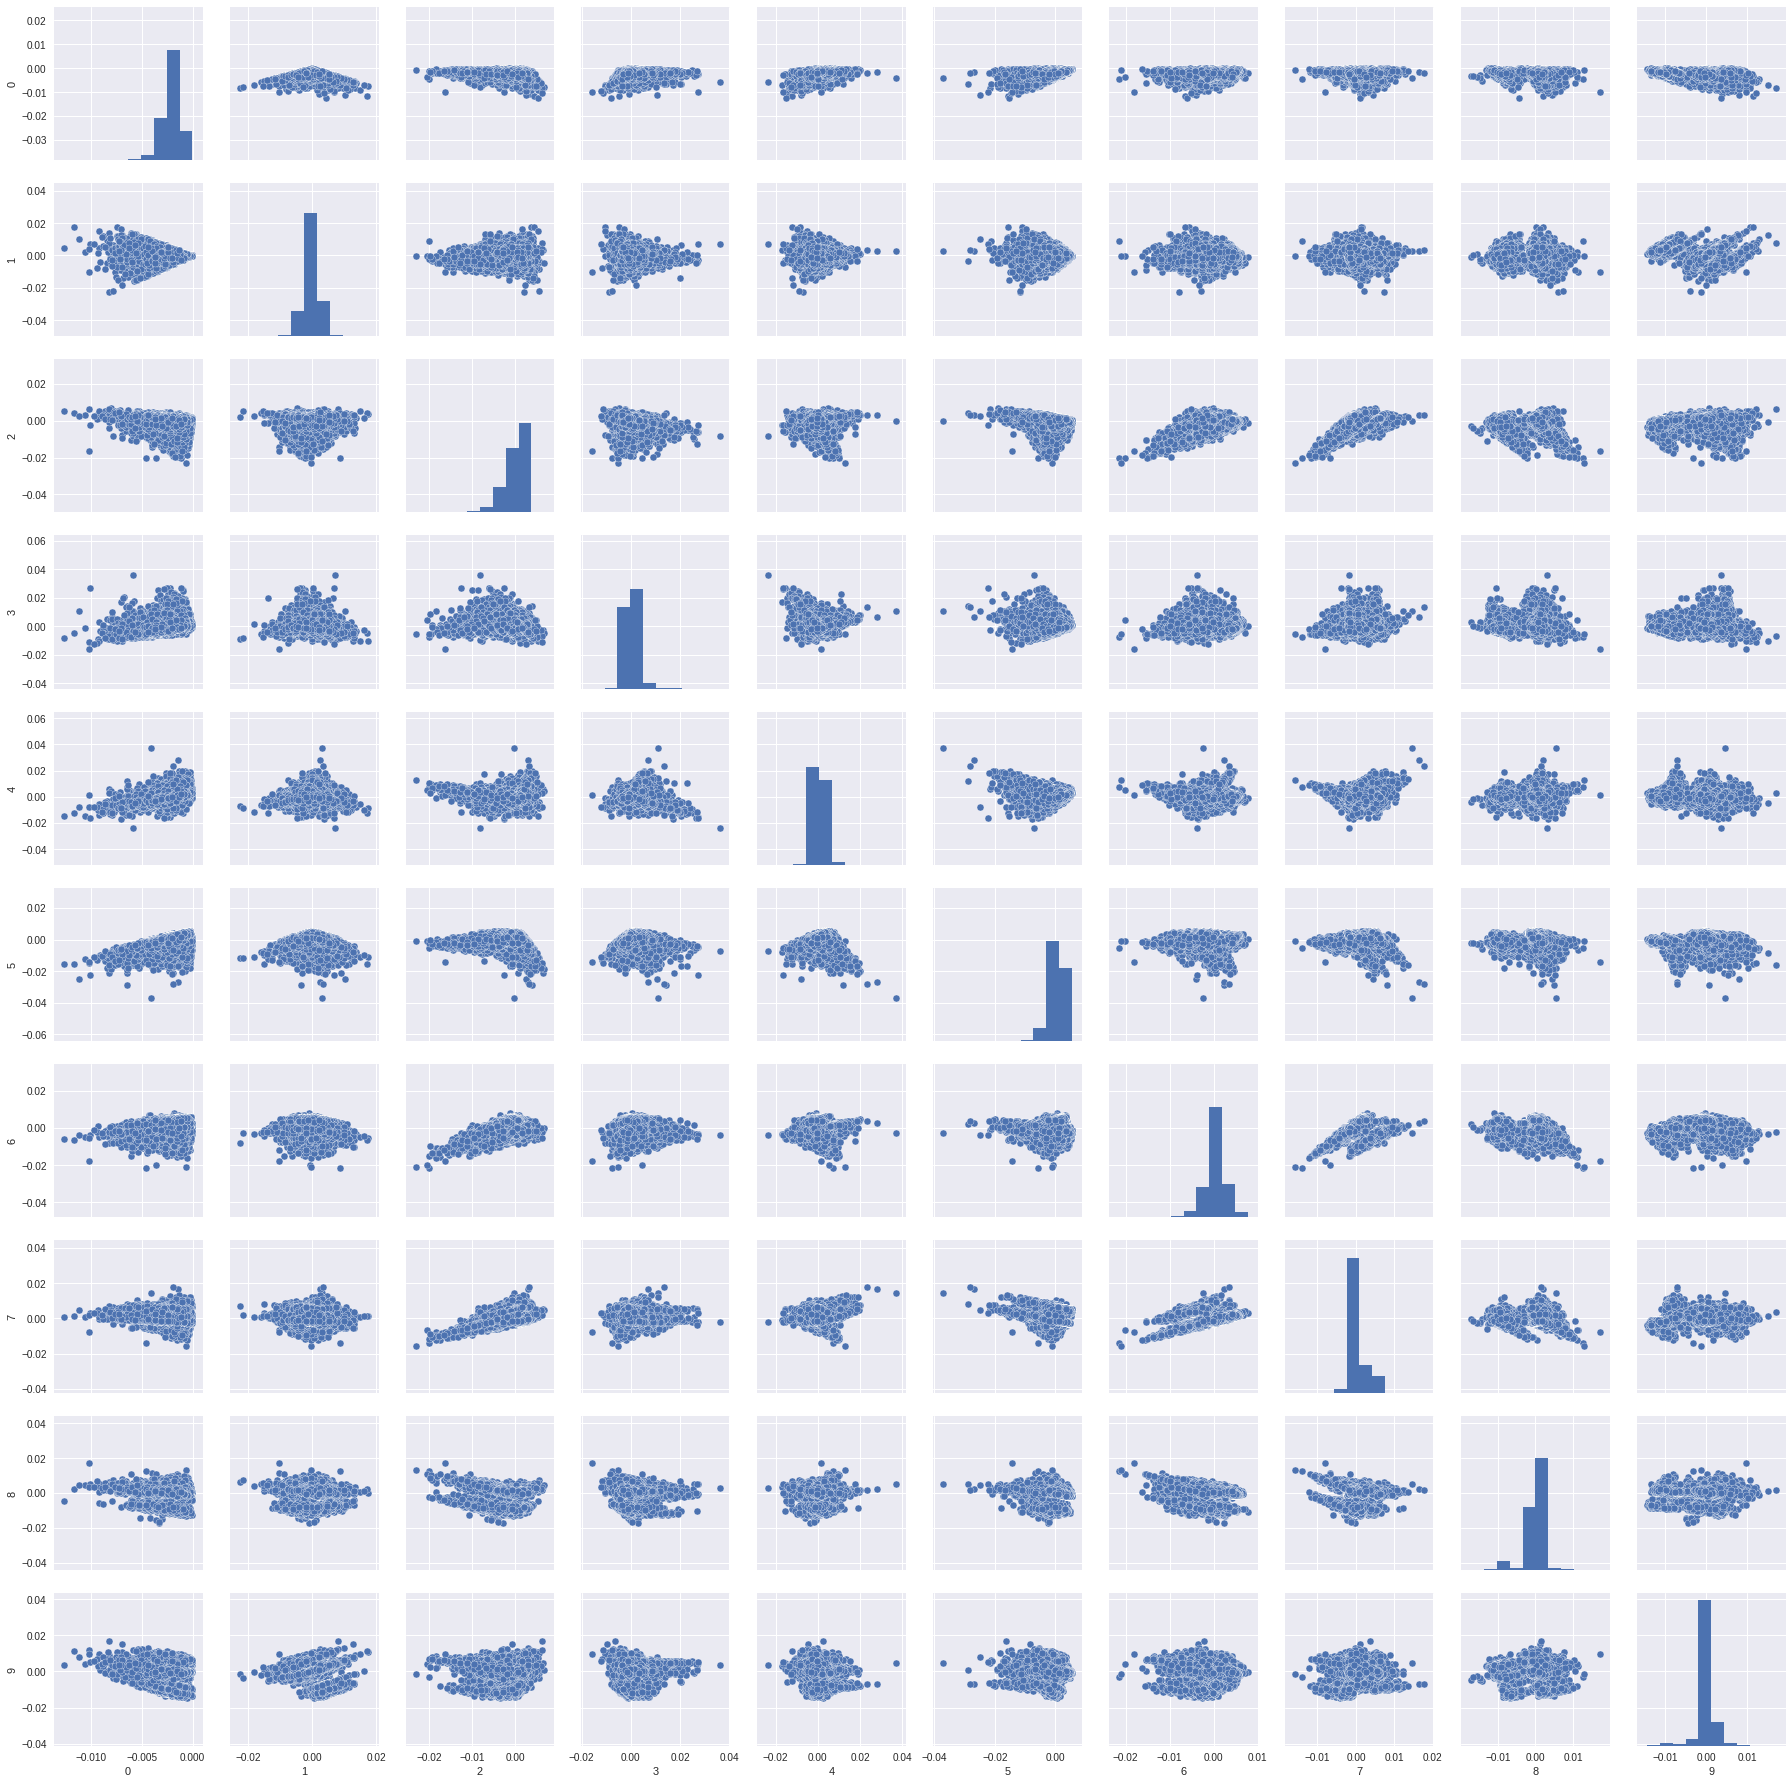

In [9]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(U[:,:10]))